In [ ]:
import pandas as pd

df = pd.read_csv('./housing.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
X = df.loc[:, ['latitude','longitude','median_income']]
X

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


<Axes: xlabel='longitude', ylabel='latitude'>

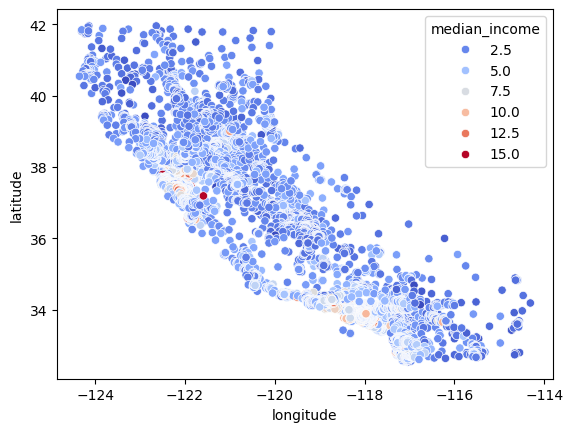

In [ ]:
import seaborn as sb

sb.scatterplot(data=X, x='longitude', y='latitude', hue='median_income', palette='coolwarm')

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6)

predicciones = model.fit_predict(X)

In [ ]:
X['cluster'] = predicciones
X

,latitude,longitude,median_income,cluster
0,37.88,-122.23,8.3252,2
1,37.86,-122.22,8.3014,2
2,37.85,-122.24,7.2574,2
3,37.85,-122.25,5.6431,5
4,37.85,-122.25,3.8462,5
...,...,...,...,...
20635,39.48,-121.09,1.5603,1
20636,39.49,-121.21,2.5568,1
20637,39.43,-121.22,1.7000,1
20638,39.43,-121.32,1.8672,1


<Axes: xlabel='longitude', ylabel='latitude'>

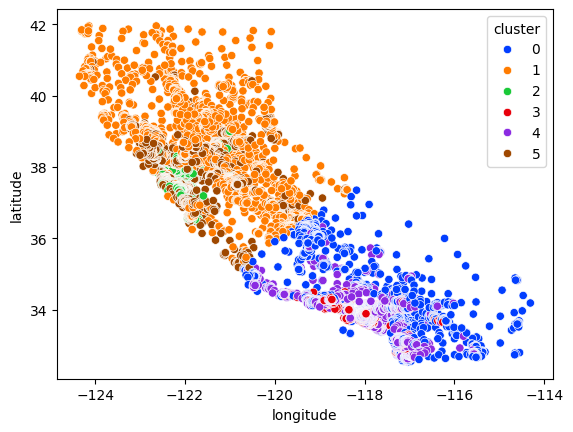

In [ ]:
sb.scatterplot(data=X, x='longitude', y='latitude', hue='cluster', palette='bright')

<Axes: xlabel='cluster', ylabel='count'>

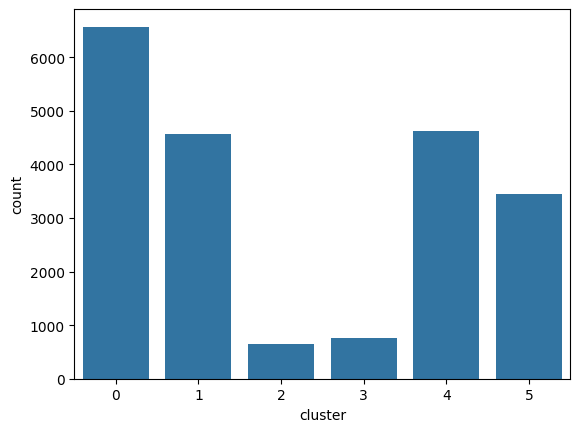

In [ ]:
sb.countplot(data=X, x='cluster')

In [ ]:
X.groupby('cluster')['median_income'].mean()

,median_income
cluster,
0,2.631274
1,2.521211
2,8.320621
3,8.920370
4,4.914859
5,4.655051
